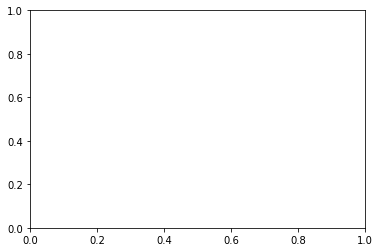

66.2 frames per second


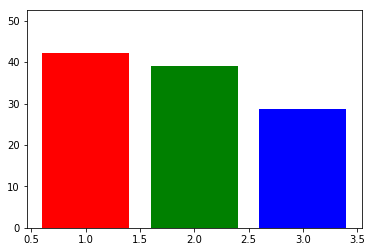

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np


def get_memory(t):
    "Simulate a function that returns system memory"
    return 100 * (0.5 + 0.5 * np.sin(0.5 * np.pi * t))


def get_cpu(t):
    "Simulate a function that returns cpu usage"
    return 100 * (0.5 + 0.5 * np.sin(0.2 * np.pi * (t - 0.25)))


def get_net(t):
    "Simulate a function that returns network bandwidth"
    return 100 * (0.5 + 0.5 * np.sin(0.7 * np.pi * (t - 0.1)))


def get_stats(t):
    return get_memory(t), get_cpu(t), get_net(t)

fig, ax = plt.subplots()
ind = np.arange(1, 4)

# show the figure, but do not block
plt.show(block=False)


pm, pc, pn = plt.bar(ind, get_stats(0))
pm.set_facecolor('r')
pc.set_facecolor('g')
pn.set_facecolor('b')
ax.set_xticks(ind)
ax.set_xticklabels(['Memory', 'CPU', 'Bandwidth'])
ax.set_ylim([0, 100])
ax.set_ylabel('Percent usage')
ax.set_title('System Monitor')

start = time.time()
for i in range(200):  # run for a little while
    m, c, n = get_stats(i / 10.0)

    # update the animated artists
    pm.set_height(m)
    pc.set_height(c)
    pn.set_height(n)

    # ask the canvas to re-draw itself the next time it
    # has a chance.
    # For most of the GUI backends this adds an event to the queue
    # of the GUI frameworks event loop.
    fig.canvas.draw_idle()
    try:
        # make sure that the GUI framework has a chance to run its event loop
        # and clear any GUI events.  This needs to be in a try/except block
        # because the default implementation of this method is to raise
        # NotImplementedError
        fig.canvas.flush_events()
    except NotImplementedError:
        pass

stop = time.time()
print("{fps:.1f} frames per second".format(fps=200 / (stop - start)))